## Data Cleaning
#### In this Jupyter Notebook you will find the process of data cleaning of a car insurance company from the USA.

First, we will import the libraries that we will be using.

In [64]:
import pandas as pd
import numpy as np
import matplotlib as plt

Then, we will import the dataset that we will be working on.

In [19]:
car = pd.read_csv('../Data/AutoInsurance.csv')

We explore the dataset.

In [20]:
car.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [21]:
car.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

Columns and explanation of columns:
- Customer: customer id
- State: State
- Customer Lifetime Value: total amount of money paid by client.
- Response: No information included
- Coverage: Type of insurance
- Education: Education level of the customer.
- Effective to Date: Date since when the insurance is active (They are usually activated in a yearly basis,if impayment it is not active)
- EmploymentStatus: Status of employment.
- Gender: Gender
- Income: Yearly income.
- Location Code:
- Marital Status: Married or not.
- Monthly Premium Auto: Amount paid in a monthly basis.
- Months since Last Claim: Months since last accident.
- Months Since Policy Inception: Months since activation of the insurance.
- Number of Open Complaints: Number of accidents still open.
- Number of Policies: Number of insurances hold by the same person
- Policy Type: Personal / Corporate
- Renew Offer Type: Next offer
- Sales Channel: Channel of sales of insurance.
- Total Claim Amount: Amount claimed by other insurances in car accident.
- Vehicle Class: Type of car.
- Vehicle Size: Size


In order to work better with data I will change some column names.

In [22]:
car.rename(columns = {'Customer Lifetime Value':'LTV', 'Effective To Date':'Expiration_date',\
                      'EmploymentStatus': 'Job_Status','Location Code':'Location',\
                      'Marital Status':'Civil_Status', 'Monthly Premium Auto':'Monthly_Price' ,\
                      'Months Since Last Claim': 'Months_LastClaim',\
                      'Months Since Policy Inception': 'Months_SinceActivation',\
                      'Number of Open Complaints':'Number_Open_Complaints',
                      'Number of Policies':'Number_Insurances',\
                      'Renew Offer Type':'Offer_Type_Renew', 'Sales Channel': 'Sales_Channel', \
                      'Total Claim Amount':'Total_Claim_Amount',\
                      'Vehicle Class':'Car_Type', 'Vehicle Size':'Car_Size'}, inplace = True)

In [23]:
car.columns

Index(['Customer', 'State', 'LTV', 'Response', 'Coverage', 'Education',
       'Expiration_date', 'Job_Status', 'Gender', 'Income', 'Location',
       'Civil_Status', 'Monthly_Price', 'Months_LastClaim',
       'Months_SinceActivation', 'Number_Open_Complaints', 'Number_Insurances',
       'Policy Type', 'Policy', 'Offer_Type_Renew', 'Sales_Channel',
       'Total_Claim_Amount', 'Car_Type', 'Car_Size'],
      dtype='object')

I decide to drop some columns since I will not be using them in this project.

In [24]:
car.drop(columns = ['Response', 'Policy', 'Offer_Type_Renew'], inplace = True)

Now I'm going to check the type of the data we have and empty values.

In [25]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 21 columns):
Customer                  9134 non-null object
State                     9134 non-null object
LTV                       9134 non-null float64
Coverage                  9134 non-null object
Education                 9134 non-null object
Expiration_date           9134 non-null object
Job_Status                9134 non-null object
Gender                    9134 non-null object
Income                    9134 non-null int64
Location                  9134 non-null object
Civil_Status              9134 non-null object
Monthly_Price             9134 non-null int64
Months_LastClaim          9134 non-null int64
Months_SinceActivation    9134 non-null int64
Number_Open_Complaints    9134 non-null int64
Number_Insurances         9134 non-null int64
Policy Type               9134 non-null object
Sales_Channel             9134 non-null object
Total_Claim_Amount        9134 non-null float64
Car_

No null values found and the data types are correct.


Let's check the describe function in order to see if there are anomalies in our data (Outliers detection).

In [26]:
car.describe()

,LTV,Income,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.381190,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


We can see some strange numbers in LTV, Income, Total_Claim_Amount

###### Let's start looking at Income.

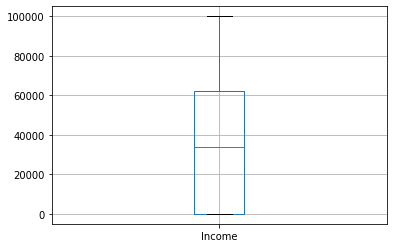

In [28]:
car.boxplot(column = 'Income') 

Even though there are no shown outliers in the Income column, there are some values at 0, which I assume where set as 0 when people didn't want to say what their annual income hence, first I will check the proportion of 0s in income and if below 10% I will delete them.

I have chosen 10% to be the limit of proportion that I will be deleting because I do not want to get rid of too many rows of my dataset.

In [56]:
#Checking the proportion of 0s in Income. 
len(car.query('Income==0'))/len(car)

0.25366761550251804

Proportion is >10%, in fact is 25%, hence, I will not delete them, I will take it into account in the analysis but I will keep them, since the other columns seem to be alright, for now.

###### LTV looking for outliers

(<Figure size 432x288 with 4 Axes>,
 array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1185c88d0>,
       dtype=object))

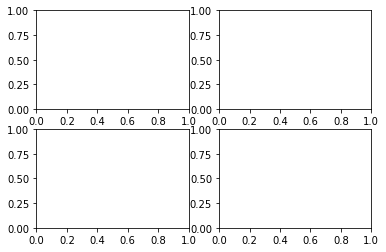

In [70]:
plt.pyplot.subplots(2,2)#By looking in the boxplot, we can see that there might be some outliers.

In [15]:
car.query('LTV > 50000')

,Customer,State,LTV,Coverage,Education,Expiration_date,Job_Status,Gender,Income,Location,...,Monthly_Price,Months_LastClaim,Months_SinceActivation,Number_Open_Complaints,Number_Insurances,Policy Type,Sales_Channel,Total_Claim_Amount,Car_Type,Car_Size
79,OM82309,California,58166.55351,Basic,Bachelor,2/27/11,Employed,M,61321,Rural,...,186,0,30,1,2,Personal Auto,Branch,427.631210,Luxury Car,Small
1974,YC54142,Washington,74228.51604,Extended,High School or Below,1/26/11,Unemployed,M,0,Suburban,...,242,1,34,0,2,Personal Auto,Branch,1742.400000,Luxury Car,Medsize
2190,KI58952,California,51337.90677,Premium,College,2/24/11,Employed,F,72794,Rural,...,164,3,47,1,2,Personal Auto,Web,50.454459,SUV,Large
2908,EN65835,Arizona,58753.88046,Premium,Bachelor,6/1/2011,Employed,F,24964,Suburban,...,185,0,84,0,2,Personal Auto,Agent,888.000000,SUV,Medsize
3145,CL79250,Nevada,52811.49112,Basic,Bachelor,8/1/2011,Unemployed,M,0,Suburban,...,182,8,70,0,2,Corporate Auto,Agent,873.600000,Luxury Car,Small
3760,AZ84403,Oregon,61850.18803,Extended,College,4/2/2011,Unemployed,F,0,Suburban,...,238,19,29,0,2,Personal Auto,Branch,1142.400000,Luxury SUV,Medsize
4126,JT47995,Arizona,60556.19213,Extended,College,1/1/2011,Unemployed,F,0,Suburban,...,204,35,45,0,2,Personal Auto,Web,979.200000,Luxury SUV,Large
4915,DU50092,Oregon,56675.93768,Premium,College,1/24/11,Employed,F,77237,Suburban,...,283,33,93,0,2,Personal Auto,Web,1358.400000,Luxury SUV,Medsize
5279,SK66747,Washington,66025.75407,Basic,Bachelor,2/22/11,Employed,M,33481,Suburban,...,188,28,46,0,2,Personal Auto,Agent,1194.892002,Luxury SUV,Medsize
5716,FQ61281,Oregon,83325.38119,Extended,High School or Below,1/31/11,Employed,M,58958,Suburban,...,231,31,74,0,2,Personal Auto,Call Center,1108.800000,Luxury Car,Small


In [ ]:
#Claim behaviour